# Background

This notebook performs background exploration for the ViolentRiskFactors project.

Specifically, we examine properties of the literature related to violence and delinquency risk factors, such as which risk factor categories are most frequently mentioned, how their prevalence changes over time, and what general associations appear in the literature.

Note: To re-run this notebook, the same relative structure as the project repository is assumed, including the data directory.

In [4]:
%matplotlib inline

import csv
import json
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from lisc.collect import collect_info, collect_counts
from lisc.plts.utils import get_cmap
from lisc.plts.words import plot_years
from lisc.plts.counts import plot_matrix

In [5]:
# Import custom project code
import sys
sys.path.append('../code')
from plts import plot_year_comparison

## Settings

Settings for the current collection & analyses.

Note that to re-run this notebook, it assumes the same relative structure as the project repository, including the data directory. 

In [6]:
# Notebook settings
SAVE_FIG = False
SAVE_DATA = True
RUN_COLLECTION = True

In [7]:
# Set the location of the data directory 
data_dir = Path('../data/data/background')
figs_dir = Path('../data/figures/background')

In [8]:
# Plot settings
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'

## Meta Data

Collect meta data information about the database we're collecting from, as a log for the collections in this notebook.

In [9]:
# Ensure the data directory exists
if not data_dir.exists():
    data_dir.mkdir(parents=True, exist_ok=True)

meta_file = data_dir / 'meta_data.json'

# Collect meta data information for current collections
if RUN_COLLECTION:
    meta_data = collect_info()
    
    # Save out meta data information
    if SAVE_DATA:
        with open(meta_file, 'w') as save_file:
            json.dump(meta_data.as_dict(), save_file)
else:
    if meta_file.exists():
        with open(meta_file, 'r') as f_obj:
            meta_data = json.load(f_obj)
    else:
        print("Warning: The file meta_data.json does not exist. Please run the collection (set RUN_COLLECTION = True) or create the file.")
        meta_data = {}  # o gestiona el cas segons el que necessitis

/Users/davidgallardo-pujol/Documents/GitHub/ViolentRiskFactors/.venv/lib/python3.9/site-packages/lisc/collect/info.py:88: XMLParsedAsHTMLWarning: It looks like you're using an HTML parser to parse an XML document.

Assuming this really is an XML document, what you're doing might work, but you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the Python package 'lxml' installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.

If you want or need to use an HTML parser on this document, you can make this warning go away by filtering it. To do that, run this code before calling the BeautifulSoup constructor:

    from bs4 import XMLParsedAsHTMLWarning
    import warnings

    warnings.filterwarnings("ignore", category=XMLParsedAsHTMLWarning)

  info_page_soup = BeautifulSoup(info_page.content, 'lxml')


In [10]:
# Check the meta data for the collection
meta_data

{'date': '2025-02-13_15:25:17', 'log': None, 'requester_n_requests': 1, 'requester_wait_time': 0.3333333333333333, 'requester_start_time': '15:25:17 Thursday 13 February 2025', 'requester_end_time': '15:25:18 Thursday 13 February 2025', 'requester_logging': None, 'db_info_dbname': 'pubmed', 'db_info_menuname': 'PubMed', 'db_info_description': 'PubMed bibliographic record', 'db_info_dbbuild': 'Build-2025.02.13.07.23', 'db_info_count': '38391592', 'db_info_lastupdate': '2025/02/13 07:23'}

## Categories

First, lets collect some basic information on different categories of risk factors.

In [11]:
# Define risk factor categories with synonyms for the ViolentRiskFactors project.
# The new classification consists of the following nine categories:
#
# 1. familial:
#    - Focuses on family-related influences such as the family environment, parental influence,
#      childhood abuse, or domestic instability.
#
# 2. cognitions & beliefs (or cognitive):
#    - Covers individual cognitive processes, including thinking patterns, belief systems, and
#      overall mental processes.
#
# 3. peers:
#    - Encompasses the influence of peers, social peers, group influence, and friendship circles.
#
# 4. lack of adaptation:
#    - Refers to difficulties in adapting, poor adaptation, maladjustment, or an inability to adapt.
#
# 5. substance abuse:
#    - Involves issues related to drug abuse, alcohol abuse, addiction, or general substance misuse.
#
# 6. personality:
#    - Relates to individual personality traits, personal characteristics, temperament, and other
#      personality factors.
#
# 7. antisocial history:
#    - Covers past antisocial behavior, criminal or delinquency history, and overall antisocial behavior.
#
# 8. recreation:
#    - Focuses on unstructured activities, risky leisure, antisocial recreation, or excessive idle time.
#
# 9. sexual:
#    - Pertains to issues such as sexual abuse, sexual violence, sexual misconduct, or sexual deviance.
risk_factor_terms = [
    ['familial', 'family environment', 'parental influence', 'childhood abuse', 'domestic instability'],
    ['cognitions & beliefs', 'cognitive', 'thinking patterns', 'belief systems', 'mental processes'],
    ['peers', 'peer influence', 'social peers', 'group influence', 'friendship circles'],
    ['lack of adaptation', 'poor adaptation', 'inability to adapt', 'maladjustment', 'difficulty adapting'],
    ['substance abuse', 'drug abuse', 'alcohol abuse', 'addiction', 'substance misuse'],
    ['personality', 'individual traits', 'personal characteristics', 'temperament', 'personality factors'],
    ['antisocial history', 'criminal record', 'delinquency', 'delinquency history', 'past antisocial behavior', 'antisocial behavior'],
    ['recreation', 'unstructured activities', 'risky leisure', 'antisocial recreation', 'idle time'],
    ['sexual', 'sexual abuse', 'sexual violence', 'sexual misconduct', 'sexual deviance']
]


# Defineix etiquetes curtes per a cada categoria
risk_factor_labels = [lst[0] for lst in risk_factor_terms]

In [12]:
# Collect data for the number of papers found for each risk factor category
if RUN_COLLECTION:
    risk_factor_count, _ = collect_counts(risk_factor_terms, collect_coocs=False)
    
    # Save out the collected data for the risk factor counts
    if SAVE_DATA:
        with open(data_dir / 'risk_factor_counts.csv', 'w') as save_file:
            for label, count in zip(risk_factor_labels, risk_factor_count):
                save_file.write(label + ',' + str(count) + '\n')

else:
    with open(data_dir / 'risk_factor_counts.csv', 'r') as f_obj:
        risk_factor_count = np.array([row[1] for row in csv.reader(f_obj)], dtype='int')


/Users/davidgallardo-pujol/Documents/GitHub/ViolentRiskFactors/.venv/lib/python3.9/site-packages/lisc/collect/counts.py:225: XMLParsedAsHTMLWarning: It looks like you're using an HTML parser to parse an XML document.

Assuming this really is an XML document, what you're doing might work, but you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the Python package 'lxml' installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.

If you want or need to use an HTML parser on this document, you can make this warning go away by filtering it. To do that, run this code before calling the BeautifulSoup constructor:

    from bs4 import XMLParsedAsHTMLWarning
    import warnings

    warnings.filterwarnings("ignore", category=XMLParsedAsHTMLWarning)

  page_soup = BeautifulSoup(page.content, 'lxml')


In [13]:
# Check the number of articles found for each risk factor category
print('Number of articles found for each risk factor category:')
for label, count in zip(risk_factor_labels, risk_factor_count):
    print('\t', label, '\t', count)

Number of articles found for each risk factor category:
	 familial 	 137367
	 cognitions & beliefs 	 8024
	 peers 	 47600
	 lack of adaptation 	 40569
	 substance abuse 	 126206
	 personality 	 110738
	 antisocial history 	 8965
	 recreation 	 10108
	 sexual 	 260161


## Risk Factors Across Time

Next, we can examine the different risk factors across time. 

To do so, we will re-run the same search as above, repeated for recent decades, to compare risk factor prevalence and trends over time.

In [14]:
# Define the range of the decades to collect information on for risk factors
start_decade, end_decade = 1950, 2020
decades = list(range(start_decade, end_decade, 10))


In [15]:
# Collect information across each decade of interest for risk factors
if RUN_COLLECTION:
    
    decade_counts = []
    for start_year in decades:

        count, _ = collect_counts(risk_factor_terms,
                                  collect_coocs=False,
                                  mindate=str(start_year) + '/01/01',
                                  maxdate=str(start_year+9) + '/12/31')
        decade_counts.append(count)

    # Convert the collected data into an array, of [n_terms, decade_counts]
    decade_counts = np.array(decade_counts).T
    
    if SAVE_DATA:
        # Ensure the 'decades' directory exists
        (data_dir / 'decades').mkdir(parents=True, exist_ok=True)
        
        # Save out the collected data for the risk factor counts by decade
        for ind, label in enumerate(risk_factor_labels):
            for decade, count in zip(decades, decade_counts):
                with open(data_dir / 'decades' / (label + '.csv'), 'w') as save_file:
                    for decade, count in zip(decades, decade_counts[ind, :]):
                        save_file.write(str(decade) + ',' + str(count) + '\n')
                        
else:
    decade_counts = []
    for r_term in risk_factor_labels:
        with open(data_dir / 'decades'/ (r_term + '.csv'), 'r') as f_obj:
            count = np.array([row[1] for row in csv.reader(f_obj)], dtype='int')
        decade_counts.append(count)
    decade_counts = np.array(decade_counts)


In [16]:
# Check the sum of the risk factors across decades
#   Note that this should approximate the total counts from above
print('Number of articles, collapsed across years, for each risk factor category:')
for label, count in zip(risk_factor_labels, np.sum(decade_counts, 1)):
    print('\t', label, '\t', count)

Number of articles, collapsed across years, for each risk factor category:
	 familial 	 113847
	 cognitions & beliefs 	 5818
	 peers 	 30369
	 lack of adaptation 	 25095
	 substance abuse 	 96234
	 personality 	 86242
	 antisocial history 	 7563
	 recreation 	 6975
	 sexual 	 194932


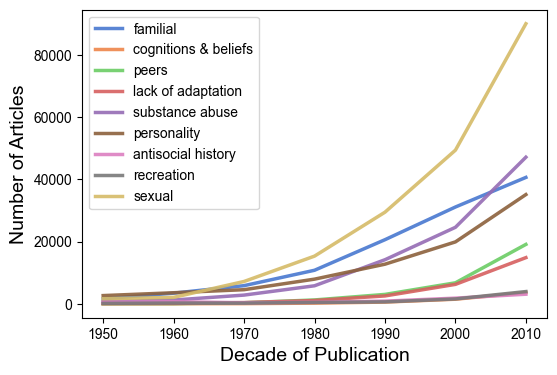

In [17]:
# Plot the popularity of each risk factor category across the decades
plot_year_comparison(decades, decade_counts, risk_factor_labels,
                     save_fig=SAVE_FIG, file_name='risk_factor_decades.pdf', directory=figs_dir)


## Number of Risk Factor Papers

Next, let's examine research on risk factors for violence and recidivism. First, we can collect the total number of papers that discuss risk factors.


In [18]:
# Define risk factor related search terms with expanded synonyms
risk_factor_term = [["violence risk factor", "recidivism risk factor", "criminogenic factors", 
                     "criminal risk factor", "offender risk factors", "predictors of violence", 
                     "risk factors for reoffending", "delinquency predictors", "crime-related risk factors", 
                     "criminogenic needs", "violent behavior predictors", "antisocial risk factors"]]


In [19]:
# Collect count of the number of papers mentioning risk factors
if RUN_COLLECTION:
    risk_factor_count, meta_data = collect_counts(risk_factor_term, collect_coocs=False)
    
    if SAVE_DATA:        
        # Save out the collected data for the risk factor count
        with open(data_dir / 'risk_factor_count.csv', 'w') as save_file:
            save_file.write('risk_factors' + ',' + str(risk_factor_count[0]) + '\n')

else:
    with open(data_dir / 'risk_factor_count.csv', 'r') as f_obj:
        risk_factor_count = np.array([row[1] for row in csv.reader(f_obj)], dtype='int')


In [20]:
# Check the total number of risk factor papers found
print('Number of risk factor papers: \t', risk_factor_count[0])

Number of risk factor papers: 	 40207


## Violence and recidivism risk factors research across years

Next, we can examine violence and recidivism research across time, by collecting the number of papers discussing those risk factors, per year.

In [21]:
# Define range of years to collect data for
start_year, end_year = 1950, 2024

In [22]:
# Collect count of the number of risk factor related papers per year
if RUN_COLLECTION:
    
    year_counts = {}
    for year in range(start_year, end_year):
        temp_count, _ = collect_counts(risk_factor_term, collect_coocs=False, 
                                       mindate=str(year) + '/01/01',
                                       maxdate=str(year) + '/12/31')
        year_counts[year] = temp_count[0]
        
    # Save out the collected data for the risk factor counts by year
    if SAVE_DATA:
        with open(data_dir / 'risk_factor_years.csv', 'w') as save_file:
            for year, count in year_counts.items():
                save_file.write(str(year) + ',' + str(count) + '\n')
                
else:
    with open(data_dir / 'risk_factor_years.csv', 'r') as f_obj:
        year_counts = {int(row[0]) : int(row[1]) for row in csv.reader(f_obj)}


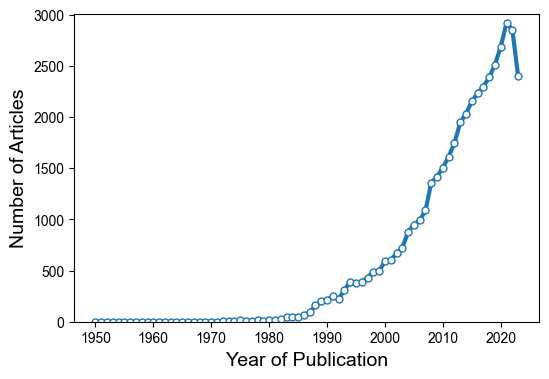

In [23]:
# Plot the number of risk factor papers per year
plot_years(year_counts, fontsize=14, figsize=(6, 4),
           save_fig=SAVE_FIG, file_name='risk_factor_years.pdf', directory=figs_dir)


## Risk factors Associations

Finally, we can do a quick scan of some common general associations of Risk factors-related work. 

To do so, we will define some very general association terms, and see how often these terms co-occur with Risk Factors research.

In [24]:
# Defineix termes d'associació per a cada categoria de factors de risc

assoc_terms = [
    # 1. familial
    ['family dysfunction', 'parenting issues', 'childhood adversity', 'domestic violence'],
    # 2. cognitions & beliefs
    ['cognitive distortions', 'rigid beliefs', 'ideological extremism', 'mental inflexibility'],
    # 3. peers
    ['peer pressure', 'gang involvement', 'social influence', 'group dynamics'],
    # 4. lack of adaptation
    ['poor coping', 'maladjustment', 'stress intolerance', 'inability to adapt'],
    # 5. substance abuse
    ['drug misuse', 'alcohol dependency', 'substance addiction', 'intoxication'],
    # 6. personality
    ['personality disorder', 'psychopathy', 'narcissism', 'impulsivity'],
    # 7. antisocial history
    ['criminal record', 'delinquency', 'recidivism', 'antisocial behavior'],
    # 8. recreation
    ['unsupervised activities', 'risky leisure', 'idle time', 'excessive free time'],
    # 9. sexual
    ['sexual violence', 'sexual misconduct', 'rape', 'sexual deviance']
]

# Defineix les etiquetes per a cada grup d'associació, utilitzant el primer terme de cada subllista
assoc_labels = [group[0] for group in assoc_terms]


# Defineix una llista d'etiquetes per als termes d'associació
assoc_labels = [term[0] for term in assoc_terms]


In [25]:
# Collect counts of the number of risk factor papers that co-occur with general association terms
if RUN_COLLECTION:
    coocs, counts, meta_data = collect_counts(risk_factor_term, terms_b=assoc_terms)
    
    # Save out the collected data for the association counts
    if SAVE_DATA:
        with open(data_dir / 'risk_factor_association_counts.csv', 'w') as save_file:
            for label, count in zip(assoc_labels, coocs[0, :]):
                save_file.write(label + ',' + str(count) + '\n')
                
else:
    with open(data_dir / 'risk_factor_association_counts.csv', 'r') as f_obj:
        coocs = np.reshape(np.array([row[1] for row in csv.reader(f_obj)], dtype='int'), (-1, 1)).T


/Users/davidgallardo-pujol/Documents/GitHub/ViolentRiskFactors/.venv/lib/python3.9/site-packages/lisc/plts/counts.py:75: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


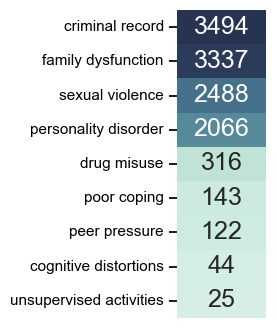

In [26]:
# Sort the matrix from largest to smallest
sorted_indices = np.argsort(-coocs[0, :])
coocs = coocs[:, sorted_indices]
assoc_labels = [assoc_labels[i] for i in sorted_indices]

# Plot a visualization of the counts of risk factor papers per association topic
plot_matrix(coocs.T, [], assoc_labels, cmap='blue', figsize=(1.15, 4),
            cbar=False, annot=True, annot_kws={"size": 18}, fmt='d', 
            save_fig=SAVE_FIG, file_name='risk_factor_associations.pdf', directory=figs_dir)

## Conclusion

From these background checks, we can see that research on risk factors for violence and recidivism is extensive and continues to be relevant across various domains. This motivates the rest of the project – to dig deeper into the literature, analyze trends, and further characterize these risk factors.
